In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df1 = pd.read_csv('AD-Tech.csv')
df = df1.sample(n=50000,replace=True,random_state=10).reset_index(drop=True)

In [2]:
cat_col=['date','geo_id','order_id','site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

for i in cat_col:
    df[i]=df[i].astype('object')

In [3]:
df.drop(['ad_unit_id','revenue_share_percent','integration_type_id'],axis=1,inplace=True)
df.drop(['ad_type_id','site_id','advertiser_id'],axis=1,inplace=True)
df.drop(['date','geo_id','order_id'],axis=1,inplace=True)

In [4]:
df.select_dtypes(object)

,device_category_id,line_item_type_id,os_id,monetization_channel_id
0,2,8,60,19
1,1,20,56,19
2,2,8,60,19
3,3,19,59,1
4,3,19,59,4
...,...,...,...,...
49995,2,20,60,19
49996,3,19,55,4
49997,2,8,60,19
49998,1,8,56,19


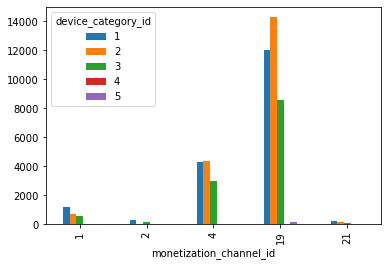

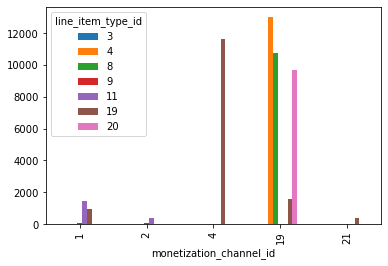

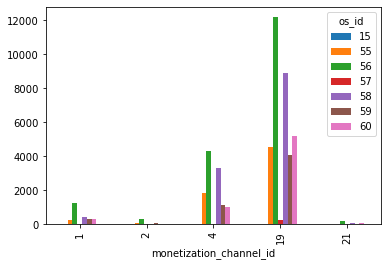

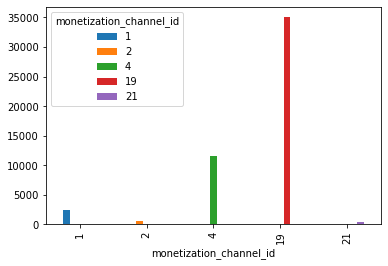

In [5]:
for i in df.select_dtypes(object).columns:
    pd.crosstab(df['monetization_channel_id'],df[i]).plot(kind='bar')
    plt.show()

In [6]:
df

,device_category_id,line_item_type_id,os_id,monetization_channel_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions
0,2,8,60,19,0,0.0000,0,0
1,1,20,56,19,2,0.0048,2,2
2,2,8,60,19,0,0.0000,0,0
3,3,19,59,1,2,0.0040,0,2
4,3,19,59,4,14,0.0020,8,14
...,...,...,...,...,...,...,...,...
49995,2,20,60,19,12,0.0148,0,10
49996,3,19,55,4,2,0.0006,0,2
49997,2,8,60,19,2,0.0000,0,2
49998,1,8,56,19,8,0.0012,0,8


In [7]:
df.isnull().sum()

device_category_id         0
line_item_type_id          0
os_id                      0
monetization_channel_id    0
total_impressions          0
total_revenue              0
viewable_impressions       0
measurable_impressions     0
dtype: int64

In [8]:
Xd = df.drop('total_revenue',axis=1)
y = df['total_revenue']

In [9]:
X=pd.get_dummies(Xd,drop_first=True)

In [10]:
pc_col=['total_impressions', 'viewable_impressions', 'measurable_impressions']

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [12]:
X[pc_col]=pd.DataFrame(ss.fit_transform(X[pc_col]),columns=[pc_col])

In [13]:


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X[pc_col])

PCA()

In [15]:

np.cumsum(pca.explained_variance_ratio_)

array([0.94228877, 0.99812526, 1.        ])

In [16]:
pca = PCA(n_components=1)
cc = pca.fit_transform(X_train[pc_col])
cd = pca.transform(X_test[pc_col])

In [17]:
X_train['PC']=cc
X_test['PC']=cd

In [18]:
X_train.drop(pc_col,axis=1,inplace=True)
X_test.drop(pc_col,axis=1,inplace=True)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
from sklearn.metrics import r2_score,mean_squared_error

In [21]:
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=lr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 Train 0.585523851431536
RMSE Train: 0.4066731098291467


Test

r2 Test 0.4301235234795002
RMSE Train: 0.4701973233291026


In [22]:
New = pd.concat([X_train,X_test]).reset_index(drop=True)
y_n = pd.concat([y_train,y_test]).reset_index(drop=True)

* #  ASSUMPTION 1 :

  #### The Regression model is linear in the Parameters.
  
  Like the following Equiations :
  

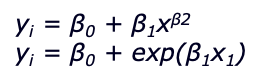

     But no like these : 
   
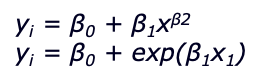

* # ASSUMPTION 2 :



 #### Residuals are normally distributed.
 
 

In [23]:
Xd = df.drop('total_revenue',axis=1)
y = df['total_revenue']

In [24]:
X=pd.get_dummies(Xd,drop_first=True)

In [25]:
import statsmodels.api as sm
Xc = sm.add_constant(New)

model = sm.OLS(y_n, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_revenue   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     3134.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:59:56   Log-Likelihood:                -27522.
No. Observations:               50000   AIC:                         5.509e+04
Df Residuals:                   49979   BIC:                         5.527e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.121e+10   1.27e+11      0.089      0.929   -2.37e+11    2.59e+11
device_category_id_2       -1.121e+10   1.27e+11     -0.089      0.929   -2.59e+11    2.37e+11
device_category_id_3       -1.121e+10   1.27e+11     -0.089      0.929   -2.59e+11    2.37e+11
device_category_id_4       -1.121e+10   1.27e+11     -0.089      0.929   -2.59e+11    2.37e+11
device_category_id_5          -0.0214      0.032     -0.664      0.506      -0.085       0.042
line_item_type_id_4            0.1582      0.090      1.750      0.080      -0.019       0.335
line_item_type_id_8            0.1408      0.090      1.557      0.119      -0.036       0.318
line_item_type_id_9            0.0656      0.094      0.700      0.484      -0.118       0.249
line_item_type_id_11          -0.0648      0.088     -0.736      0.462      -0.238       0.108
line_item_type_id_19           0.0967      0.090      1.078      0.281      -0.079       0.273
line_item_type_id_20           0.2050      0.090      2.267      0.023       0.028       0.382
os_id_55                       0.0030      0.177      0.017      0.987      -0.344       0.350
os_id_56                   -1.121e+10   1.27e+11     -0.089      0.929   -2.59e+11    2.37e+11
os_id_57                       0.0069      0.079      0.088      0.930      -0.147       0.161
os_id_58                       0.0198      0.074      0.266      0.790      -0.126       0.165
os_id_59                      -0.0307      0.177     -0.173      0.863      -0.378       0.317
os_id_60                      -0.0203      0.074     -0.272      0.785      -0.166       0.126
monetization_channel_id_2      0.0776      0.023      3.392      0.001       0.033       0.122
monetization_channel_id_4      0.0133      0.014      0.929      0.353      -0.015       0.041
monetization_channel_id_19    -0.0445      0.017     -2.575      0.010      -0.078      -0.011
monetization_channel_id_21    -0.0148      0.025     -0.583      0.560      -0.065       0.035
PC                             0.2788      0.001    247.813      0.000       0.277       0.281
==============================================================================
Omnibus:                    82386.178   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1581387339.511
Skew:                           9.810   Prob(JB):                         0.00
Kurtosis:                     874.023   Cond. No.                     2.54e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.2e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix

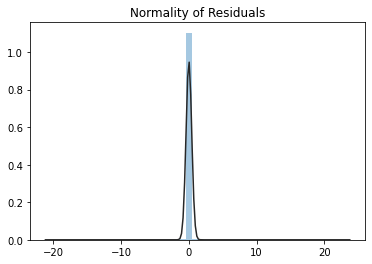

In [26]:
residuals = model.resid
from scipy.stats import norm
norm.fit(residuals)
sns.distplot(residuals, fit=norm, kde=False)
plt.title('Normality of Residuals')
plt.show()

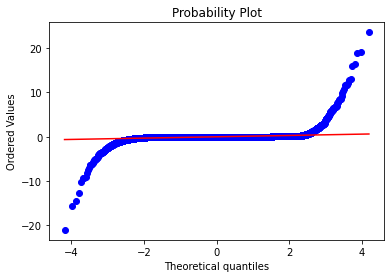

In [27]:
## QQ Plot 

from scipy import stats

stats.probplot(residuals,plot=plt)
plt.show()


In [28]:
## Jarque-Berra Test

print(stats.jarque_bera(residuals))

Jarque_beraResult(statistic=1581387339.5110848, pvalue=0.0)


H0: Data is normal

H1: Data is not normal

p-value is 0.0 (less than significance level). We will reject H0 and conclude that residuals are not normal.

In [29]:
### Transform y to try and fix normality issue

sqrty = np.sqrt(y_n)
model = sm.OLS(sqrty, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_revenue   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     3452.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:59:56   Log-Likelihood:                 21778.
No. Observations:               50000   AIC:                        -4.351e+04
Df Residuals:                   49979   BIC:                        -4.333e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -6.111e+09   4.72e+10     -0.129      0.897   -9.87e+10    8.65e+10
device_category_id_2        6.111e+09   4.72e+10      0.129      0.897   -8.65e+10    9.87e+10
device_category_id_3        6.111e+09   4.72e+10      0.129      0.897   -8.65e+10    9.87e+10
device_category_id_4        6.111e+09   4.72e+10      0.129      0.897   -8.65e+10    9.87e+10
device_category_id_5          -0.0245      0.012     -2.033      0.042      -0.048      -0.001
line_item_type_id_4            0.1766      0.034      5.236      0.000       0.110       0.243
line_item_type_id_8            0.2087      0.034      6.186      0.000       0.143       0.275
line_item_type_id_9            0.0244      0.035      0.697      0.486      -0.044       0.093
line_item_type_id_11          -0.0241      0.033     -0.733      0.464      -0.089       0.040
line_item_type_id_19           0.1815      0.033      5.422      0.000       0.116       0.247
line_item_type_id_20           0.2937      0.034      8.706      0.000       0.228       0.360
os_id_55                       0.0388      0.066      0.588      0.557      -0.091       0.168
os_id_56                    6.111e+09   4.72e+10      0.129      0.897   -8.65e+10    9.87e+10
os_id_57                       0.0187      0.029      0.636      0.525      -0.039       0.076
os_id_58                       0.0518      0.028      1.868      0.062      -0.003       0.106
os_id_59                       0.0263      0.066      0.397      0.691      -0.103       0.156
os_id_60                       0.0377      0.028      1.359      0.174      -0.017       0.092
monetization_channel_id_2      0.0276      0.009      3.238      0.001       0.011       0.044
monetization_channel_id_4     -0.0416      0.005     -7.811      0.000      -0.052      -0.031
monetization_channel_id_19    -0.1306      0.006    -20.258      0.000      -0.143      -0.118
monetization_channel_id_21    -0.0320      0.009     -3.369      0.001      -0.051      -0.013
PC                             0.1039      0.000    247.639      0.000       0.103       0.105
==============================================================================
Omnibus:                    40600.056   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        180568440.791
Skew:                          -2.317   Prob(JB):                         0.00
Kurtosis:                     297.366   Cond. No.                     2.54e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.2e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix

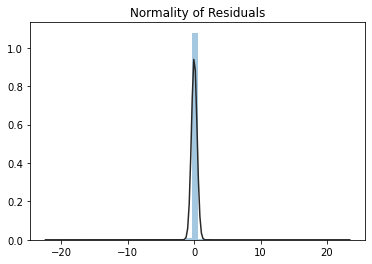

In [46]:
residuals = model.resid
from scipy.stats import norm
norm.fit(residuals)
sns.distplot(residuals, fit=norm, kde=False)
plt.title('Normality of Residuals')
plt.show()

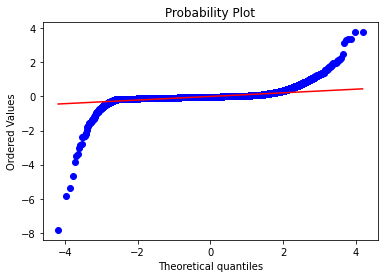

In [30]:
residuals = model.resid
import scipy.stats as stats
stats.probplot(residuals, plot=plt)
plt.show()

In [31]:
## Jarque-Berra Test

print(stats.jarque_bera(residuals))

Jarque_beraResult(statistic=180568440.7909281, pvalue=0.0)


# Assumption-3 

#### Constant variance of residuals(homoscedasticity)

In [32]:
model = sm.OLS(y_n, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_revenue   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     3134.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:59:57   Log-Likelihood:                -27522.
No. Observations:               50000   AIC:                         5.509e+04
Df Residuals:                   49979   BIC:                         5.527e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.121e+10   1.27e+11      0.089      0.929   -2.37e+11    2.59e+11
device_category_id_2       -1.121e+10   1.27e+11     -0.089      0.929   -2.59e+11    2.37e+11
device_category_id_3       -1.121e+10   1.27e+11     -0.089      0.929   -2.59e+11    2.37e+11
device_category_id_4       -1.121e+10   1.27e+11     -0.089      0.929   -2.59e+11    2.37e+11
device_category_id_5          -0.0214      0.032     -0.664      0.506      -0.085       0.042
line_item_type_id_4            0.1582      0.090      1.750      0.080      -0.019       0.335
line_item_type_id_8            0.1408      0.090      1.557      0.119      -0.036       0.318
line_item_type_id_9            0.0656      0.094      0.700      0.484      -0.118       0.249
line_item_type_id_11          -0.0648      0.088     -0.736      0.462      -0.238       0.108
line_item_type_id_19           0.0967      0.090      1.078      0.281      -0.079       0.273
line_item_type_id_20           0.2050      0.090      2.267      0.023       0.028       0.382
os_id_55                       0.0030      0.177      0.017      0.987      -0.344       0.350
os_id_56                   -1.121e+10   1.27e+11     -0.089      0.929   -2.59e+11    2.37e+11
os_id_57                       0.0069      0.079      0.088      0.930      -0.147       0.161
os_id_58                       0.0198      0.074      0.266      0.790      -0.126       0.165
os_id_59                      -0.0307      0.177     -0.173      0.863      -0.378       0.317
os_id_60                      -0.0203      0.074     -0.272      0.785      -0.166       0.126
monetization_channel_id_2      0.0776      0.023      3.392      0.001       0.033       0.122
monetization_channel_id_4      0.0133      0.014      0.929      0.353      -0.015       0.041
monetization_channel_id_19    -0.0445      0.017     -2.575      0.010      -0.078      -0.011
monetization_channel_id_21    -0.0148      0.025     -0.583      0.560      -0.065       0.035
PC                             0.2788      0.001    247.813      0.000       0.277       0.281
==============================================================================
Omnibus:                    82386.178   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1581387339.511
Skew:                           9.810   Prob(JB):                         0.00
Kurtosis:                     874.023   Cond. No.                     2.54e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.2e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix

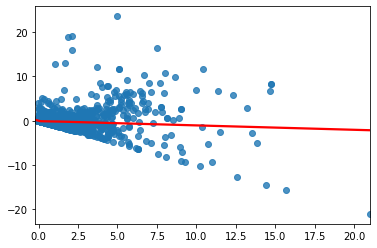

In [33]:
residuals = model.resid
y_pred = model.predict(Xc)

sns.regplot(x=y_pred, y=residuals, lowess=True, 
            line_kws={'color':'red'})
plt.show()

In [34]:
## Goldfeld Quandt Test of Homoscedasticity

import statsmodels.stats.api as sms

test = sms.het_goldfeldquandt(y=residuals, x=Xc)
test

(1.1576027343268658, 3.2872643459798805e-31, 'increasing')

H0: variance of residuals is constant across the range of data 
H1: variance of residuals is not constant across the range of data 

Since p(0.99) is greater than significance level, we failed to reject H0 to conclude that variance of residuals is  constant.

# Assumption-4 

#### Auto-correlation between the residuals

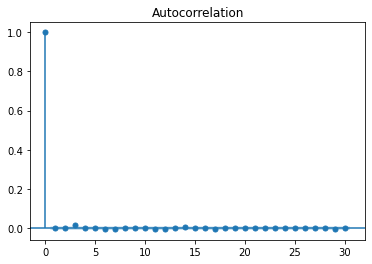

In [35]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residuals, lags=30)
acf.show()

ACF plot show no auto-correlation which is also supported by DW value of 1.997. 
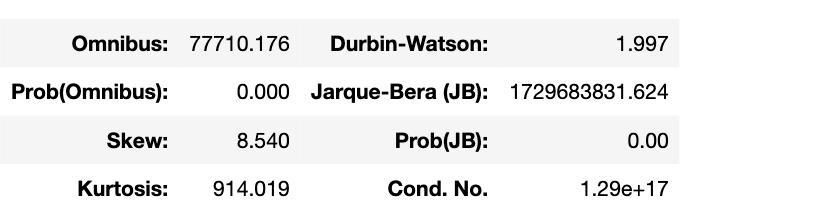

# Assumption 5

#### Multicollinearity

In [36]:
import statsmodels.api as sm
Xc = sm.add_constant(X)

model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_revenue   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     2886.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:00:44   Log-Likelihood:                -27342.
No. Observations:               50000   AIC:                         5.473e+04
Df Residuals:                   49977   BIC:                         5.493e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0958      0.093     -1.036      0.300      -0.277       0.086
total_impressions              0.0013   7.76e-05     16.528      0.000       0.001       0.001
viewable_impressions           0.0023   4.14e-05     55.961      0.000       0.002       0.002
measurable_impressions        -0.0001   9.02e-05     -1.544      0.123      -0.000    3.75e-05
device_category_id_2          -0.0307      0.053     -0.582      0.560      -0.134       0.073
device_category_id_3          -0.0211      0.134     -0.157      0.875      -0.285       0.242
device_category_id_4          -0.0368      0.104     -0.354      0.723      -0.241       0.167
device_category_id_5          -0.0227      0.032     -0.705      0.481      -0.086       0.040
line_item_type_id_4            0.1799      0.090      1.997      0.046       0.003       0.357
line_item_type_id_8            0.1653      0.090      1.835      0.067      -0.011       0.342
line_item_type_id_9            0.0663      0.093      0.710      0.478      -0.117       0.250
line_item_type_id_11          -0.0646      0.088     -0.736      0.461      -0.237       0.107
line_item_type_id_19           0.1054      0.089      1.179      0.238      -0.070       0.281
line_item_type_id_20           0.2301      0.090      2.553      0.011       0.053       0.407
os_id_55                       0.0035      0.177      0.020      0.984      -0.342       0.349
os_id_56                      -0.0072      0.062     -0.116      0.908      -0.129       0.115
os_id_57                       0.0077      0.078      0.098      0.922      -0.146       0.161
os_id_58                       0.0251      0.074      0.339      0.735      -0.120       0.170
os_id_59                      -0.0308      0.177     -0.174      0.862      -0.377       0.315
os_id_60                      -0.0149      0.074     -0.202      0.840      -0.160       0.130
monetization_channel_id_2      0.0814      0.023      3.574      0.000       0.037       0.126
monetization_channel_id_4      0.0096      0.014      0.672      0.502      -0.018       0.037
monetization_channel_id_19    -0.0657      0.017     -3.809      0.000      -0.100      -0.032
monetization_channel_id_21    -0.0184      0.025     -0.727      0.467      -0.068       0.031
==============================================================================
Omnibus:                    77710.176   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1729683831.624
Skew:                           8.540   Prob(JB):                         0.00
Kurtosis:                     914.019   Cond. No.                     9.73e+16
==============================================================================

Notes:
[1] Standard Errors assume that the 

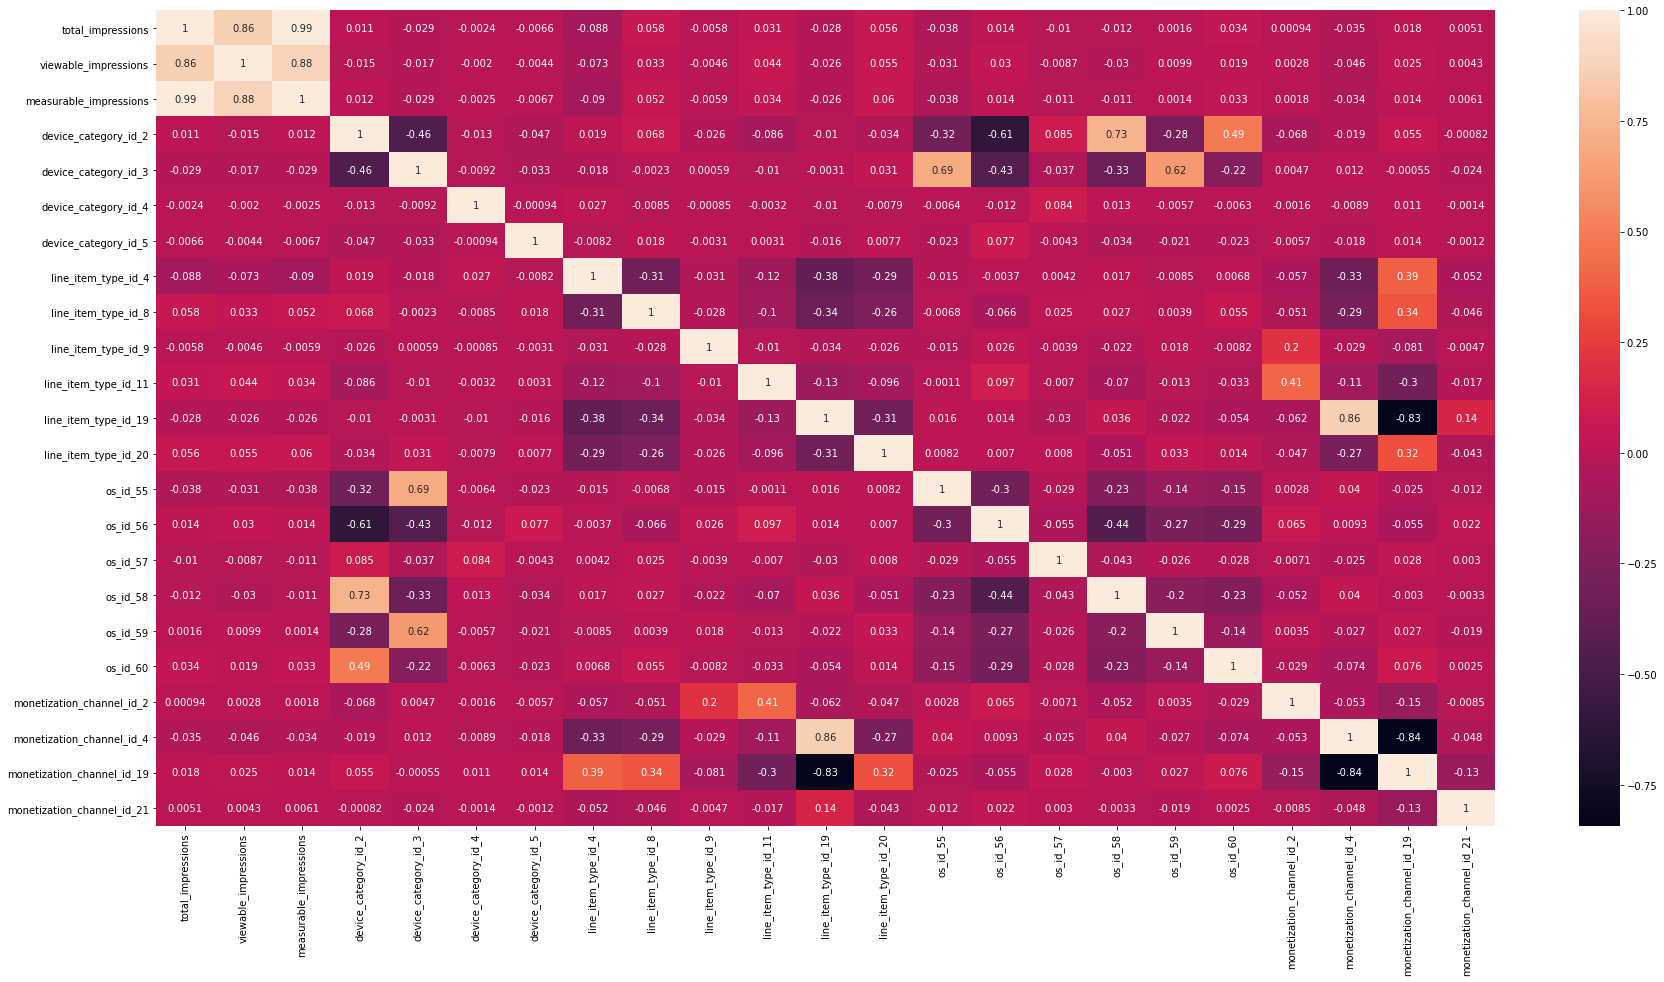

In [37]:
plt.figure(figsize=(30, 15))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vf = [vif(Xc.values, i) for i in range(Xc.shape[1])]
vf1=pd.DataFrame(vf, index=Xc.columns, columns=['vif'])
vf1

,vif
const,0.000000
total_impressions,83.060953
viewable_impressions,5.006897
measurable_impressions,97.130482
device_category_id_2,inf
device_category_id_3,inf
device_category_id_4,inf
device_category_id_5,1.007144
line_item_type_id_4,446.826599
line_item_type_id_8,392.520564


In [39]:
Xc = Xc.drop(['device_category_id_2','device_category_id_3','device_category_id_4',
             'line_item_type_id_4','line_item_type_id_8','line_item_type_id_19',
             'line_item_type_id_20','os_id_55','os_id_56','os_id_58','os_id_59',
             'os_id_60'], axis=1)

In [40]:
vf = [vif(Xc.values, i) for i in range(Xc.shape[1])]
vf2=pd.DataFrame(vf, index=Xc.columns, columns=['vif'])
vf2

,vif
const,52.328375
total_impressions,82.805750
viewable_impressions,4.960365
measurable_impressions,96.754120
device_category_id_5,1.000529
line_item_type_id_9,1.191351
line_item_type_id_11,2.980402
os_id_57,1.001042
monetization_channel_id_2,1.269495
monetization_channel_id_4,10.084830


In [41]:
model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_revenue   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     5715.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:00:50   Log-Likelihood:                -27482.
No. Observations:               50000   AIC:                         5.499e+04
Df Residuals:                   49988   BIC:                         5.509e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0144      0.014     -1.063      0.288      -0.041       0.012
total_impressions              0.0012   7.77e-05     15.868      0.000       0.001       0.001
viewable_impressions           0.0023   4.13e-05     55.450      0.000       0.002       0.002
measurable_impressions     -7.253e-05   9.02e-05     -0.804      0.422      -0.000       0.000
device_category_id_5          -0.0103      0.032     -0.321      0.748      -0.073       0.053
line_item_type_id_9           -0.0330      0.039     -0.853      0.394      -0.109       0.043
line_item_type_id_11          -0.1604      0.017     -9.325      0.000      -0.194      -0.127
os_id_57                      -0.0027      0.026     -0.105      0.917      -0.053       0.048
monetization_channel_id_2      0.0759      0.022      3.436      0.001       0.033       0.119
monetization_channel_id_4      0.0174      0.014      1.234      0.217      -0.010       0.045
monetization_channel_id_19     0.0196      0.014      1.424      0.154      -0.007       0.047
monetization_channel_id_21    -0.0099      0.025     -0.389      0.697      -0.060       0.040
==============================================================================
Omnibus:                    77602.521   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1709564472.258
Skew:                           8.516   Prob(JB):                         0.00
Kurtosis:                     908.705   Cond. No.                     7.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assumption 6 
### Linearity of Relationship

Linearity of relationship refers to the relationship between y and y_pred. If the model is appropriate, this relationship will be linear.

In [47]:
model = sm.OLS(y, Xc).fit()
y_pred = model.predict(Xc)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_revenue   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     5715.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:01:19   Log-Likelihood:                -27482.
No. Observations:               50000   AIC:                         5.499e+04
Df Residuals:                   49988   BIC:                         5.509e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0144      0.014     -1.063      0.288      -0.041       0.012
total_impressions              0.0012   7.77e-05     15.868      0.000       0.001       0.001
viewable_impressions           0.0023   4.13e-05     55.450      0.000       0.002       0.002
measurable_impressions     -7.253e-05   9.02e-05     -0.804      0.422      -0.000       0.000
device_category_id_5          -0.0103      0.032     -0.321      0.748      -0.073       0.053
line_item_type_id_9           -0.0330      0.039     -0.853      0.394      -0.109       0.043
line_item_type_id_11          -0.1604      0.017     -9.325      0.000      -0.194      -0.127
os_id_57                      -0.0027      0.026     -0.105      0.917      -0.053       0.048
monetization_channel_id_2      0.0759      0.022      3.436      0.001       0.033       0.119
monetization_channel_id_4      0.0174      0.014      1.234      0.217      -0.010       0.045
monetization_channel_id_19     0.0196      0.014      1.424      0.154      -0.007       0.047
monetization_channel_id_21    -0.0099      0.025     -0.389      0.697      -0.060       0.040
==============================================================================
Omnibus:                    77602.521   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1709564472.258
Skew:                           8.516   Prob(JB):                         0.00
Kurtosis:                     908.705   Cond. No.                     7.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

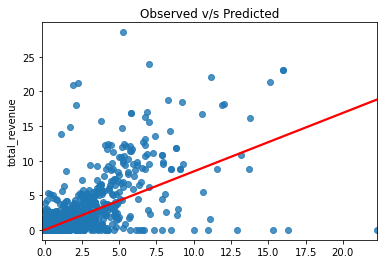

In [48]:
sns.regplot(x=y_pred, y=y, lowess=True, line_kws={'color':'red'})
plt.title('Observed v/s Predicted')
plt.show()

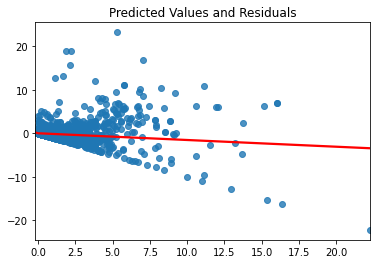

In [49]:
sns.regplot(x=y_pred, y=residuals, lowess=True, 
            line_kws={'color':'red'})
plt.title('Predicted Values and Residuals')
plt.show()

In [45]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model)

(1.209357129229836, 2.9506453803027845e-51)

H0: fit of model using full sample = fit of model using a central subset (linear relationship)
H1: fit of model using full sample is worse compared  to fit of model using a central subset 

Since p-value(2.950645380281232e-51) is less than significance level, we will reject the H0 to conclude that the model is inappropriate.